# Data Collection

In [121]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [123]:
#importing the data
data=pd.read_csv(r"C:\Project\IBM\traffic volume.csv")

In [124]:
#displaying first 5 columns of the data 
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


# Data Preparation

In [125]:
#used to display the basic information of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [126]:
#used to find shape of the data
data.shape

(48204, 8)

### Handling missing values

In [127]:
#used todisplay the null values of the data
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [128]:
#filling NaN values with mean,median and mode using fillna() method
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)



In [129]:
from typing import Counter
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [130]:
data['weather'].fillna('Clouds',inplace=True)

### Handling data and time column

In [131]:
#splitting the date column into year,month,day
data[["day","month","year"]]=data["date"].str.split("-",expand=True)

In [132]:
#splitting the date column into year,month,day
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [133]:
data.drop(columns=['date','Time'],axis=1,inplace=True)
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [134]:
#used to understand the descriptive analysis of the data
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


### Checking Correlation

In [135]:
import matplotlib.pyplot as plt
data.corr()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_12608\2463821536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


C:\Users\nikhi\AppData\Local\Temp\ipykernel_12608\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

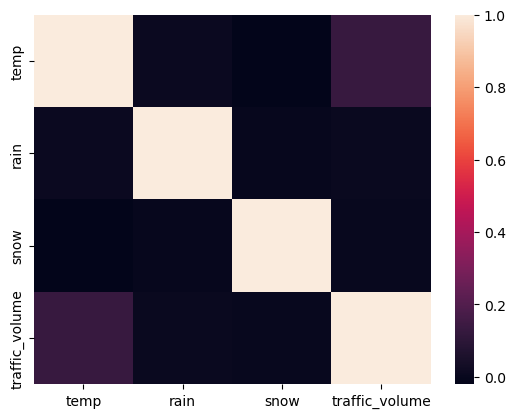

In [136]:
sns.heatmap(data.corr())

### Encoding the data

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
le=LabelEncoder()

In [139]:
data['weather']=le.fit_transform(data['weather'])

In [140]:
data['holiday']=le.fit_transform(data['holiday'])

In [141]:
data

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,7,283.45,0.0,0.0,1,3543,30,09,2018,19,00,00
48200,7,282.76,0.0,0.0,1,2781,30,09,2018,20,00,00
48201,7,282.73,0.0,0.0,10,2159,30,09,2018,21,00,00
48202,7,282.09,0.0,0.0,1,1450,30,09,2018,22,00,00


In [142]:
data.describe()





,holiday,temp,rain,snow,weather,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,6.997780,281.205351,0.334278,0.000222,2.576695,3259.818355
std,0.139999,13.336338,44.789133,0.008168,2.783488,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,272.180000,0.000000,0.000000,0.000000,1193.000000
50%,7.000000,282.429000,0.000000,0.000000,1.000000,3380.000000
75%,7.000000,291.800000,0.000000,0.000000,5.000000,4933.000000
max,11.000000,310.070000,9831.300000,0.510000,10.000000,7280.000000


# Exploratory Data Analysis

### Univariate Analysis

<Axes: xlabel='weather', ylabel='count'>

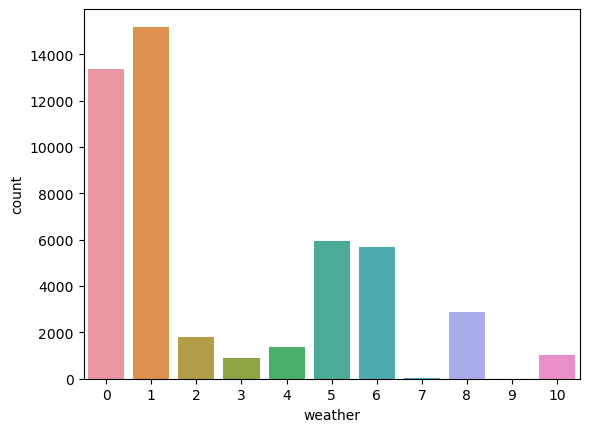

In [143]:
sns.countplot(x=data['weather'])

### Bivariate Analysis

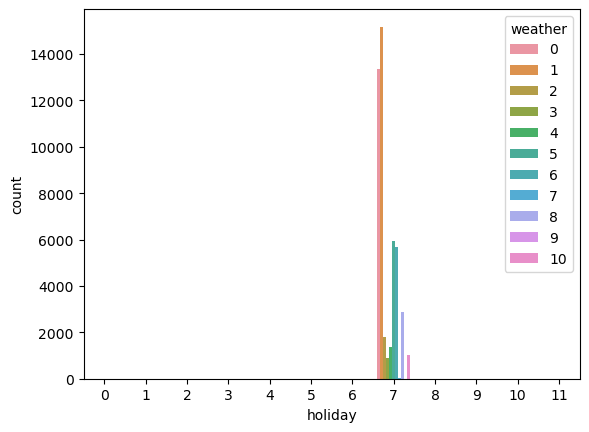

In [144]:
sns.countplot(x=data['holiday'],hue=data['weather'])
plt.show()

### Multivariate Analysis

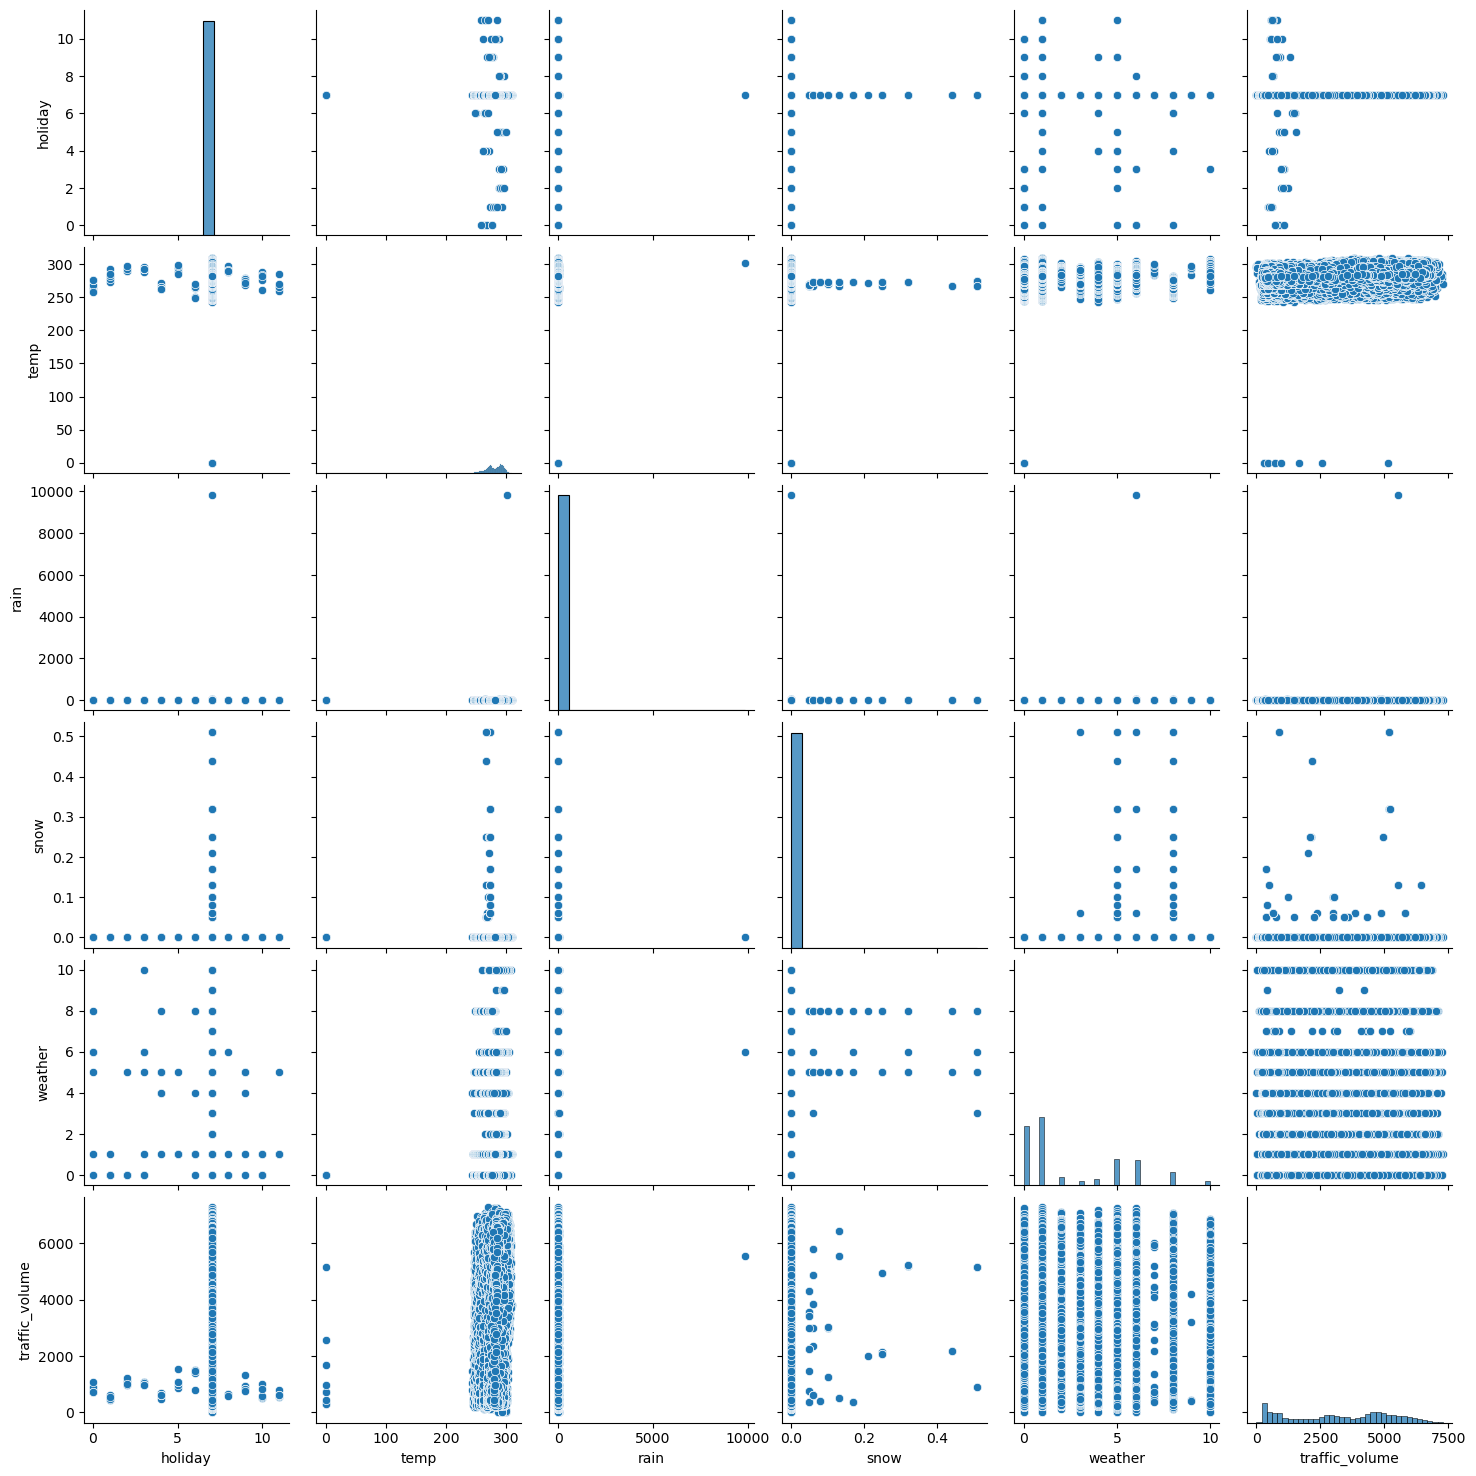

In [145]:
sns.pairplot(data)

<Axes: >

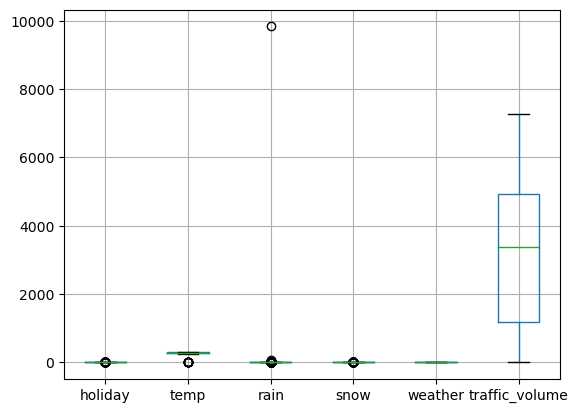

In [146]:
data.boxplot()

### Splitting data into X and Y

In [147]:
y=data['traffic_volume']

In [148]:
x=data.drop(columns=['traffic_volume'],axis=1)

In [149]:
names=x.columns


In [150]:
from sklearn.preprocessing import scale
x=scale(x)
x=pd.DataFrame(x,columns=names)
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


### Splitting the data into Train and Test

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building

### Training the model

In [152]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost


In [153]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [154]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [165]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=svr.predict(x_train)
p5=XGB.predict(x_train)

### Testing the model

In [156]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [157]:
from sklearn import metrics
from sklearn.metrics import classification_report


In [158]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [159]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.399396398322171
0.696246876366159
0.8042583868615718
-11.972215715232423
0.8065613781045625


### Randomforest gives best r-score value

In [160]:
MSE=metrics.mean_squared_error(p3,y_test)

In [161]:
np.sqrt(MSE)

796.5192672088438

### Saving the Model

In [162]:
import pickle

In [163]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))